Outline
* Aggregation
* Split, Appy, Combine
* Tabulation

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Aggregation
Data Agrregation consists of operations that result in a scalar (e.g. `mean()`, `sum()`, `count()`, etc)

[Source](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

In [4]:
dframe_wine = pd.read_csv('winequality-red.csv', sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Series.mean()
dframe_wine['alcohol'].mean() # dframe_wine.describe()['alcohol']['mean']

10.422983114446529

In [10]:
# Customize aggregate function
def max_to_min(arr):
    return arr.max() - arr.min()

In [16]:
wino = dframe_wine.groupby('quality')

In [18]:
wino.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                       
3       count      10.000000         10.000000    10.000000       10.000000   
        mean        8.360000          0.884500     0.171000        2.635000   
        std         1.770875          0.331256     0.250664        1.401596   
        min         6.700000          0.440000     0.000000        1.200000   
        25%         7.150000          0.647500     0.005000        1.875000   
        50%         7.500000          0.845000     0.035000        2.100000   
        75%         9.875000          1.010000     0.327500        3.100000   
        max        11.600000          1.580000     0.660000        5.700000   
4       count      53.000000         53.000000    53.000000       53.000000   
        mean        7.779245          0.693962     0.174151        2.694340   
        std         1.626624          0.220110     0.201030        1.789436   
        min         4.600000          0.230000     0.000000        1.300000   
        25%         6.800000          0.530000     0.030000        1.900000   
        50%         7.500000          0.670000     0.090000        2.100000   
        75%         8.400000          0.870000     0.270000        2.800000   
        max        12.500000          1.130000     1.000000       12.900000   
5       count     681.000000        681.000000   681.000000      681.000000   
        mean        8.167254          0.577041     0.243686        2.528855   
        std         1.563988          0.164801     0.180003        1.359753   
        min         5.000000          0.180000     0.000000        1.200000   
        25%         7.100000          0.460000     0.090000        1.900000   
        50%         7.800000          0.580000     0.230000        2.200000   
        75%         8.900000          0.670000     0.360000        2.600000   
        max        15.900000          1.330000     0.790000       15.500000   
6       count     638.000000        638.000000   638.000000      638.000000   
        mean        8.347179          0.497484     0.273824        2.477194   
        std         1.797849          0.160962     0.195108        1.441576   
        min         4.700000          0.160000     0.000000        0.900000   
        25%         7.000000          0.380000     0.090000        1.900000   
        50%         7.900000          0.490000     0.260000        2.200000   
        75%         9.400000          0.600000     0.430000        2.500000   
        max        14.300000          1.040000     0.780000       15.400000   
7       count     199.000000        199.000000   199.000000      199.000000   
        mean        8.872362          0.403920     0.375176        2.720603   
        std         1.992483          0.145224     0.194432        1.371509   
        min         4.900000          0.120000     0.000000        1.200000   
        25%         7.400000          0.300000     0.305000        2.000000   
        50%         8.800000          0.370000     0.400000        2.300000   
        75%        10.100000          0.485000     0.490000        2.750000   
        max        15.600000          0.915000     0.760000        8.900000   
8       count      18.000000         18.000000    18.000000       18.000000   
        mean        8.566667          0.423333     0.391111        2.577778   
        std         2.119656          0.144914     0.199526        1.295038   
        min         5.000000          0.260000     0.030000        1.400000   
        25%         7.250000          0.335000     0.302500        1.800000   
        50%         8.250000          0.370000     0.420000        2.100000   
        75%        10.225000          0.472500     0.530000        2.600000   
        max        12.600000          0.850000     0.720000        6.400000   

                chlorides  free sulfur dioxide  total sulfur dio

In [21]:
# Aggregate using input function of {column -> function}
wino.aggregate(max_to_min) # .aggregate等同於.agg

# 以quality 3的fixed acidity為例，max - min = 11.6 - 6.7 = 4.9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [28]:
# DataFrameGroupBy擁有的function，直接使用string
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [29]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [30]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [31]:
# Use pivot tables instead of groupby
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [32]:
%matplotlib inline

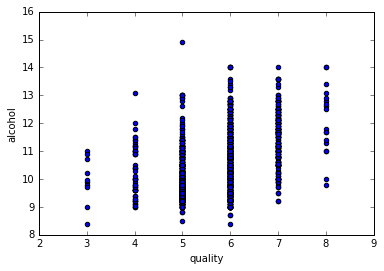

In [33]:
dframe_wine.plot(kind='scatter', x='quality', y='alcohol')

# Split, Apply, Combine

In [46]:
dframe_wine = pd.read_csv('winequality-red.csv', sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 我們想要知道每個quality中alcohol最高是多少

實作上有很多不同的方式可以達到，這邊只是為了示範Split -> Apply -> Combine這一思考過程

以及使用`apply()`這個method來將每個group內的data做分別的處理

In [47]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [48]:
# Step 1. Sort by alcohol
dframe_wine.sort_values(by='alcohol', ascending=False, inplace=True)

In [49]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
467,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
821,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.400,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7


In [50]:
# Step 2. 將每個quailty group內的data排序(rank)
# e.g. Group A有10筆data，rank 1~10，Group B有20筆data，rank 1~20
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [51]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,1
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,1
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,1
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,2
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6,3
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8,2
467,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6,4
821,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,1
1114,5.0,0.400,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6,5
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7,2


In [45]:
# Step 3. 算出每個quality group內總共有幾筆data
num_of_qual = dframe_wine['quality'].value_counts()
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [57]:
# Step 4. 找出每個quality group內alc_content_rank為1(最高)的data
dframe_wine[dframe_wine['alc_content_rank'] == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


In [62]:
# 驗證
dframe_wine.groupby('quality').describe()['alcohol'][:, 'max']

quality
3    11.0
4    13.1
5    14.9
6    14.0
7    14.0
8    14.0
Name: alcohol, dtype: float64

# Tabulation

In [63]:
from StringIO import StringIO

In [64]:
# 這邊"""後加上\的原因是不想讓首行出現換行字元\n
data ="""\
Sample   Animal   Intelligence
1        Dog     Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

In [79]:
dframe = pd.read_table(StringIO(data), sep='\s+') # check regular expression
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [81]:
pd.crosstab(dframe.Animal, dframe.Intelligence, margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6


In [94]:
a = np.array(['foo', 'foo', 'foo', 'foo', 'bar', 'bar',
     'bar', 'bar', 'foo', 'foo', 'foo'])

b = np.array(['one', 'one', 'one', 'two', 'one', 'one',
     'one', 'two', 'two', 'two', 'one'])

c = np.array(['dull', 'dull', 'shiny', 'dull', 'dull', 'shiny',
     'shiny', 'dull', 'shiny', 'shiny', 'shiny'])

In [97]:
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2